# Abstract

As the COVID is growing rapidly across the globe, there are variations in how the testing has been taken care by the countries. Massive population testing could have a significant effect on mortality in different ways. This study aims to evaluate the impact of virus testing on new positive cases, deaths and case fatality rate (CFR) in the European countries. Case fatality rate is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a particular period. Here, I have considered the period to be weekly depending on the data available. This analysis may help decision-makers to administer healthcare measures to limit the spread of the disease. In this study, we have plotted various graphs to show the trend of the new cases, CFR and deaths with respect to the other variables like positivity rate, week and number of testing. From the correlation plot, we can see that are two waves till date where corona virus hits the peak. We found that the increase in testing rate leads to growth in the number of positive cases. Also, mass testing will help to drop the case fatality rate because the patients can take care of their health before it gets severe. Also, it is observed that the countries United Kingdom, Spain, Italy and Germany are affected more than other countries in the Europe. 

# Introduction

The COVID-19 pandemic is considered as the most crucial global health calamity of the century and the greatest challenge that the humankind faced since the 2nd World War. In December 2019, a new infectious respiratory disease emerged in Wuhan, Hubei province, China. It was named by the World Health Organization as COVID-19 (coronavirus disease 2019). A new class of virus, known as SARS-CoV-2 (severe acute respiratory syndrome coronavirus 2) has been found to be responsible for occurrence of this disease. In the history of mankind there are instances of severe outbreaks of diseases caused by several viruses. According to the report of the WHO, the current outbreak of COVID-19, has affected over 40 million people and killed more than 1.1 million people throughout the world. It has rapidly spread around the world, posing enormous health, economic, environmental and social challenges to the entire human population. The coronavirus severely disrupted the global economy causing lot of people to lose their jobs or loss in business. Most of the organizations have stopped the investments for a year because of COVID. On the other hand, digital platforms are getting more appreciation for the entertainment, education and advertising purpose. Almost all the nations are struggling to slow down the transmission of the disease by testing & treating patients, quarantine suspected people through contact tracing, restricting large gatherings, maintaining complete or partial lock down etc. Now there are clinically approved antiviral drugs or vaccines that are effective against COVID-19 which will out in market in a month.

With this study, we can relate the effect of testing on the new cases and deaths happening in the countries due to COVID-19. We expect that testing rate plays major role in examining the spread of corona virus and case fatality rate. The relation between different variables can be given by plotting various graphs for the confirmed cases, confirmed deaths and covid testing in the countries. Due importance is given to the geographical aspects as we know that there are few countries where COVID is spread badly and there are few countries where its almost over and they have started to open the markets for regular use. Also, the population of the country plays a vital role in determining the growth of covid due to the density of the population. 

Here, the plan is to use the daily cases data along with the weekly testing data concentrated on Europe region. I have considered this data as we do not have daily testing data available and, we do not have the data for other regions in the csv files separated. Here, we assume that the external factors such that preventive measures taken by government for controlling the pandemic remains constant as we do not have the data for the same. Also, we cannot analyze the level of impact these measures have on the covid cases. It may happen that because of lockdown people roam very less on roads, typically for the daily needs. Hence, the spread of corona is avoided. Also, it may be possible that the covid patients are taking care of themselves at home and not going to hospitals for the testing. Also, we assume that the covid should with respect to time and after some time the trend should reverse. We are aiming to examine these assumptions in our analysis to show the linearity between the variables. As we are considering the case fatality rate weekly and daily, it is formulated by the weekly and daily deaths to the cases.

The report is divided into Data Pre-processing, Exploratory data analysis, hypothesis testing, regression modeling and residual plots. In the first section, the data is imported form the csv files provided, cleaned for the missing or false values and new columns are created based on the factual data in the same dataset. Here, we have transformed the daily data to weekly to get the final dataset for the analysis and modeling. The section exploratory data analysis gives us the behavior of each variable and their plots to show the relation between different variables. Also, it gives us the notion of how important predictor is for the prediction of response variable. Then we have tested for hypothesis we have assumed before modeling the data which shows us that whether our data is significant to process. If we can reject the null hypothesis then we can check which variable fits in the model using the various regression techniques. It is also important to check the variance inflation factor to statistically calculate the multicollinearity in the variables with the use of statmodels. We can plot the residuals to check whether the value we have fitted are significantly near to the actual values using difference residual plots.


# Data  Pre-processing

## Daily Cases by Country

We have imported the file daily cases by country and found some null values in the columns Cumulative_number_for_14_days_of_COVID-19, geoId, countryterritoryCode and popData2019 which is international conveyance japan_cases_per_100000. The reason we are getting the null values in column geoId is because Namibia country has NA value so by default the geoId is taken as null. Hence, we need to replace the NAN value to NA code. We have null value for columns countryterritoryCode and popData2019 because of geoId JPG11668 which is international conveyance Japan and as we do not bother about this geography in our data, we will keep it as it is. Values in column Cumulative_number_for_14_days_of_COVID-19 are null because for the first 14 days this column has values null in csv. Hence, we can put the values as zero to replace.

After looking at the scatter plot between cases and deaths we have found some negative values in the data which is not possible because cases and deaths cannot be negative. We have converted these negative values to the absolute values of these columns. Also, we have created a column case fatality rate dividing the deaths with the number of cases on that day to use in further analysis. We have to create the week column by transforming the date column. We need to create aggregated data for calculating the weekly deaths for each country grouping the data by country, region and weeks. 


In [222]:
import pandas as pd
#load the daily cases data
daily = pd.read_csv("daily-cases-by-country.csv")
daily.head(4)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,17/10/2020,17,10,2020,47,4,Afghanistan,AF,AFG,38041757.0,Asia,2.058265
1,16/10/2020,16,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.947860
2,15/10/2020,15,10,2020,32,1,Afghanistan,AF,AFG,38041757.0,Asia,1.992547
3,14/10/2020,14,10,2020,66,0,Afghanistan,AF,AFG,38041757.0,Asia,1.945231


In [223]:
#calculate the null entries in all the columns
daily.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          217
countryterritoryCode                                            64
popData2019                                                     64
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2783
dtype: int64

In [224]:
#check the null entries in gwoId column
daily[daily['geoId'].isnull()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
31739,17/10/2020,17,10,2020,112,1,Namibia,NaN,NAM,2494524.0,Africa,29.464539
31740,16/10/2020,16,10,2020,34,0,Namibia,NaN,NAM,2494524.0,Africa,29.264100
31741,15/10/2020,15,10,2020,69,1,Namibia,NaN,NAM,2494524.0,Africa,32.230598
31742,14/10/2020,14,10,2020,11,0,Namibia,NaN,NAM,2494524.0,Africa,34.475515
31743,13/10/2020,13,10,2020,53,1,Namibia,NaN,NAM,2494524.0,Africa,34.796218
...,...,...,...,...,...,...,...,...,...,...,...,...
31951,19/03/2020,19,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
31952,18/03/2020,18,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
31953,17/03/2020,17,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
31954,16/03/2020,16,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN


In [225]:
# Replace the geography id for Namibia country
daily["geoId"].fillna("NA", inplace = True)
daily[daily['countriesAndTerritories'] == 'Namibia']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
31739,17/10/2020,17,10,2020,112,1,Namibia,NA,NAM,2494524.0,Africa,29.464539
31740,16/10/2020,16,10,2020,34,0,Namibia,NA,NAM,2494524.0,Africa,29.264100
31741,15/10/2020,15,10,2020,69,1,Namibia,NA,NAM,2494524.0,Africa,32.230598
31742,14/10/2020,14,10,2020,11,0,Namibia,NA,NAM,2494524.0,Africa,34.475515
31743,13/10/2020,13,10,2020,53,1,Namibia,NA,NAM,2494524.0,Africa,34.796218
...,...,...,...,...,...,...,...,...,...,...,...,...
31951,19/03/2020,19,3,2020,0,0,Namibia,NA,NAM,2494524.0,Africa,NaN
31952,18/03/2020,18,3,2020,0,0,Namibia,NA,NAM,2494524.0,Africa,NaN
31953,17/03/2020,17,3,2020,0,0,Namibia,NA,NAM,2494524.0,Africa,NaN
31954,16/03/2020,16,3,2020,0,0,Namibia,NA,NAM,2494524.0,Africa,NaN


In [226]:
#check the null entries in popData2019 column
daily[daily['popData2019'].isnull()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
8789,10/03/2020,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
8790,02/03/2020,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
8791,01/03/2020,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
8792,29/02/2020,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
8793,28/02/2020,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8848,04/01/2020,4,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
8849,03/01/2020,3,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
8850,02/01/2020,2,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
8851,01/01/2020,1,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN


In [227]:
#check the null entries in Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 column
daily[daily['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].isnull()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
269,12/01/2020,12,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
270,11/01/2020,11,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
271,10/01/2020,10,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
272,09/01/2020,9,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
273,08/01/2020,8,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49567,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
49568,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
49569,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
49570,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [228]:
#Replace the null values in Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 column with the zero values
daily["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].fillna(0, inplace = True)
daily[daily['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].isnull()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000


Text(0.5, 1.0, 'Scatterplot for Cases Vs Deaths')

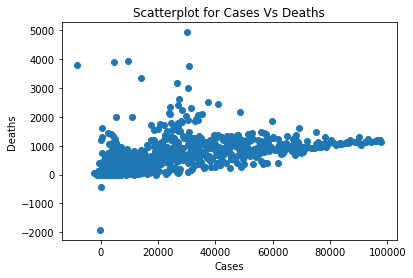

In [229]:
#plot the cases column versus the deaths columns
import matplotlib.pyplot as plt
plt.scatter(daily['cases'], daily['deaths'])
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title('Scatterplot for Cases Vs Deaths')

In [230]:
#check negative entries in cases column
daily[daily['cases']<0]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
5093,20/05/2020,20,5,2020,-209,0,Benin,BJ,BEN,11801151.0,Africa,0.288107
8789,10/03/2020,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,0.000000
13542,07/09/2020,7,9,2020,-8261,3800,Ecuador,EC,ECU,17373657.0,America,11.598019
13660,12/05/2020,12,5,2020,-50,18,Ecuador,EC,ECU,17373657.0,America,36.083365
13663,09/05/2020,9,5,2020,-1480,50,Ecuador,EC,ECU,17373657.0,America,101.504249
13665,07/05/2020,7,5,2020,-2461,49,Ecuador,EC,ECU,17373657.0,America,106.885960
16498,03/06/2020,3,6,2020,-766,107,France,FR,FRA,67012883.0,Europe,11.785793
23534,20/06/2020,20,6,2020,-148,47,Italy,IT,ITA,60359546.0,Europe,5.765451
24254,11/09/2020,11,9,2020,-6,0,Jersey,JE,JEY,107796.0,Europe,6.493747
24517,22/07/2020,22,7,2020,-110,0,Jordan,JO,JOR,10101697.0,Asia,-0.554362


In [231]:
#converting negative values to absolute values
daily["cases"] = abs(daily["cases"])
daily[daily['cases']<0]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000


In [232]:
#checking the negative values in deaths column
daily[daily['deaths']<0]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
12097,06/07/2020,6,7,2020,75,-3,Czechia,CZ,CZE,10649800.0,Europe,18.939323
12098,05/07/2020,5,7,2020,121,-1,Czechia,CZ,CZE,10649800.0,Europe,18.704577
22639,03/10/2020,3,10,2020,466,-5,Ireland,IE,IRL,4904240.0,Europe,97.711368
23529,25/06/2020,25,6,2020,577,-31,Italy,IT,ITA,60359546.0,Europe,6.042126
25156,06/08/2020,6,8,2020,218,-12,Kosovo,XK,XKX,1798506.0,Europe,178.259066
25645,24/08/2020,24,8,2020,237,-443,Kyrgyzstan,KG,KGZ,6415851.0,Asia,45.964284
42351,12/08/2020,12,8,2020,3172,-2,Spain,ES,ESP,46937060.0,Europe,100.438758
42430,25/05/2020,25,5,2020,372,-1918,Spain,ES,ESP,46937060.0,Europe,16.255812


In [233]:
#converting negative values to absolute values
daily["deaths"] = abs(daily["deaths"])
daily[daily['deaths']<0]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000


In [234]:
import numpy as np

#The Case Fatality Rate (CFR) is the ratio between confirmed deaths and confirmed cases.
daily['cfr'] = np.where(daily["cases"] == 0,0,daily['deaths']/daily['cases'])
daily.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cfr
0,17/10/2020,17,10,2020,47,4,Afghanistan,AF,AFG,38041757.0,Asia,2.058265,0.085106
1,16/10/2020,16,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.947860,0.000000
2,15/10/2020,15,10,2020,32,1,Afghanistan,AF,AFG,38041757.0,Asia,1.992547,0.031250
3,14/10/2020,14,10,2020,66,0,Afghanistan,AF,AFG,38041757.0,Asia,1.945231,0.000000
4,13/10/2020,13,10,2020,129,3,Afghanistan,AF,AFG,38041757.0,Asia,1.811168,0.023256


In [235]:
#transform the datetime column to week
daily['datetime'] = pd.to_datetime(daily['dateRep'],format='%d/%m/%Y')
daily['Week'] = daily['datetime'].dt.strftime("%V")
daily['year_week'] = '2020-W'+ daily['Week']
daily.head(4)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cfr,datetime,Week,year_week
0,17/10/2020,17,10,2020,47,4,Afghanistan,AF,AFG,38041757.0,Asia,2.058265,0.085106,2020-10-17,42,2020-W42
1,16/10/2020,16,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.947860,0.000000,2020-10-16,42,2020-W42
2,15/10/2020,15,10,2020,32,1,Afghanistan,AF,AFG,38041757.0,Asia,1.992547,0.031250,2020-10-15,42,2020-W42
3,14/10/2020,14,10,2020,66,0,Afghanistan,AF,AFG,38041757.0,Asia,1.945231,0.000000,2020-10-14,42,2020-W42


In [236]:
#create aggregated data at week level
daily_aggregated = daily.sort_values('Week').groupby(['year_week','geoId','continentExp']).agg(deaths=('deaths', sum))

daily_aggregated = daily_aggregated.reset_index()
daily_aggregated.to_csv(r'File Name.csv', index = False)

daily_aggregated.head()


,year_week,geoId,continentExp,deaths
0,2020-W01,AE,Asia,0
1,2020-W01,AF,Asia,0
2,2020-W01,AM,Europe,0
3,2020-W01,AT,Europe,0
4,2020-W01,AU,Oceania,0


## Weekly Testing Data for Europe

We have to another file Weekly testing data for Europe that we are going to consider in this analysis which has null values in the column positivity rate. After looking thoroughly into the data we have replaced the values in the column positivity rate by zero where tests_done and new_cases are zero. After imputing these values there are still some null values in the column but those are due to the false entries which shows the new_cases are greater than tests_done. We need to remove such entries from the data.


In [237]:
#loading the weekly testing data
weekly_tests = pd.read_csv("weekly_testing_data_europe.csv")
weekly_tests.head()

,country,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W15,2041,12339,8858775,139.285624,16.541049,Manual webscraping
1,Austria,AT,2020-W16,855,58488,8858775,660.226724,1.461838,Manual webscraping
2,Austria,AT,2020-W17,472,33443,8858775,377.512692,1.411357,Manual webscraping
3,Austria,AT,2020-W18,336,26598,8858775,300.244673,1.263253,Country website
4,Austria,AT,2020-W19,307,42153,8858775,475.833284,0.728299,Country website


In [238]:
#null entries in columns
weekly_tests.isnull().sum()

country                 0
country_code            0
year_week               0
new_cases               0
tests_done              0
population              0
testing_rate            0
positivity_rate        23
testing_data_source     0
dtype: int64

In [239]:
# data with null entries in positivity rate
weekly_tests[weekly_tests['positivity_rate'].isnull()]

,country,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
115,Cyprus,CY,2020-W11,21,14,875899,1.598358,NaN,Survey
146,Czechia,CZ,2020-W01,0,0,10649800,0.000000,NaN,TESSy
147,Czechia,CZ,2020-W02,0,0,10649800,0.000000,NaN,TESSy
148,Czechia,CZ,2020-W03,0,0,10649800,0.000000,NaN,TESSy
149,Czechia,CZ,2020-W04,0,0,10649800,0.000000,NaN,TESSy
158,Czechia,CZ,2020-W13,1668,0,10649800,0.000000,NaN,TESSy
494,Italy,IT,2020-W01,0,0,60359546,0.000000,NaN,Survey
495,Italy,IT,2020-W02,0,0,60359546,0.000000,NaN,Survey
496,Italy,IT,2020-W03,0,0,60359546,0.000000,NaN,Survey
497,Italy,IT,2020-W04,0,0,60359546,0.000000,NaN,Survey


In [240]:
#Replace the values with zero
weekly_tests['positivity_rate'] = np.where((weekly_tests["new_cases"] == 0) & (weekly_tests["tests_done"] == 0),0,weekly_tests['positivity_rate'])
weekly_tests[weekly_tests['positivity_rate'].isnull()]

,country,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
115,Cyprus,CY,2020-W11,21,14,875899,1.598358,NaN,Survey
158,Czechia,CZ,2020-W13,1668,0,10649800,0.000000,NaN,TESSy
498,Italy,IT,2020-W05,3,0,60359546,0.000000,NaN,Survey
501,Italy,IT,2020-W08,76,0,60359546,0.000000,NaN,Survey
805,Romania,RO,2020-W12,254,2,19414458,0.010302,NaN,TESSy
806,Romania,RO,2020-W13,1085,12,19414458,0.061810,NaN,TESSy


In [241]:
# Removing the false entries
weekly_tests = weekly_tests[weekly_tests['tests_done'] >= weekly_tests['new_cases']]
#Extract week column from the year_week column
weekly_tests['Week'] = weekly_tests['year_week'].str.slice(6,8).astype(int)

weekly_tests.isnull().sum()

country                0
country_code           0
year_week              0
new_cases              0
tests_done             0
population             0
testing_rate           0
positivity_rate        0
testing_data_source    0
Week                   0
dtype: int64

## Combined Dataset

Now, we need to create the final data to consider for the analysis combining the above two pre-processed datasets. For this purpose, we can join the two datasets on the week and country columns. As we have followed above, we need to create weekly case fatality rate column for this new column. We have centered all the numeric columns in the data to consider into the model.


In [242]:
# join the above two datasets on country code and year_week
weekly_deaths = weekly_tests.merge(daily_aggregated, how='inner', left_on=["year_week", "country_code"], right_on=["year_week","geoId"])
#Calculate the weekly case fatality rate
weekly_deaths['weekly_cfr'] =np.where(weekly_deaths["new_cases"] == 0,0,weekly_deaths['deaths']/weekly_deaths['new_cases'])

#Centering the columns
weekly_deaths['population_ce'] = (weekly_deaths['population']-weekly_deaths['population'].mean())/weekly_deaths['population'].std()
weekly_deaths['testing_rate_ce'] = (weekly_deaths['testing_rate']-weekly_deaths['testing_rate'].mean())/weekly_deaths['testing_rate'].std()
weekly_deaths['tests_done_ce'] = (weekly_deaths['tests_done']-weekly_deaths['tests_done'].mean())/weekly_deaths['tests_done'].std()
weekly_deaths['new_cases_ce'] = (weekly_deaths['new_cases']-weekly_deaths['new_cases'].mean())/weekly_deaths['new_cases'].std()
weekly_deaths['deaths_ce'] = (weekly_deaths['deaths']-weekly_deaths['deaths'].mean())/weekly_deaths['deaths'].std()
weekly_deaths['positivity_rate_ce'] = (weekly_deaths['positivity_rate']-weekly_deaths['positivity_rate'].mean())/weekly_deaths['positivity_rate'].std()

#Removing the unnecessary columns
weekly_deaths = weekly_deaths.drop(['geoId','testing_data_source','continentExp','year_week','country_code'], axis=1)

weekly_deaths.to_csv(r'File Name.csv', index = False)

weekly_deaths.head()

,country,new_cases,tests_done,population,testing_rate,positivity_rate,Week,deaths,weekly_cfr,population_ce,testing_rate_ce,tests_done_ce,new_cases_ce,deaths_ce,positivity_rate_ce
0,Austria,2041,12339,8858775,139.285624,16.541049,15,151,0.073983,-0.367777,-0.591084,-0.443821,-0.184997,-0.068348,2.252248
1,Austria,855,58488,8858775,660.226724,1.461838,16,106,0.123977,-0.367777,-0.177296,-0.249228,-0.293373,-0.129623,-0.379518
2,Austria,472,33443,8858775,377.512692,1.411357,17,93,0.197034,-0.367777,-0.401858,-0.354834,-0.328372,-0.147325,-0.388328
3,Austria,336,26598,8858775,300.244673,1.263253,18,60,0.178571,-0.367777,-0.463233,-0.383696,-0.340800,-0.192260,-0.414177
4,Austria,307,42153,8858775,475.833284,0.728299,19,19,0.061889,-0.367777,-0.323761,-0.318107,-0.343450,-0.248088,-0.507542


# Exploratory Data Analysis

## Cases Vs Deaths

The scatterplot shows that the linearity between deaths and cases declines as the number of cases grows per day. But there are few entries in death column which has higher values as compared to others. After looking thoroughly into the data, we can say that these entries belongs to the America during the first outbreak.


Text(0.5, 1.0, 'Scatterplot for Cases Vs Deaths')

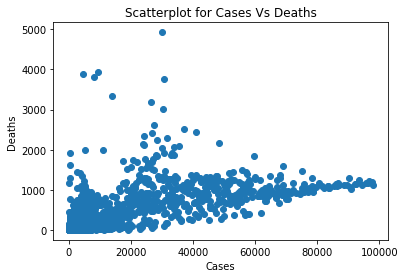

In [243]:
#Again plotting the data to check the values and trend
plt.scatter(daily['cases'], daily['deaths'])
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title('Scatterplot for Cases Vs Deaths')

In [244]:
#checking the deaths column for higher values
daily[daily['deaths']>3000]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cfr,datetime,Week,year_week
1652,02/10/2020,2,10,2020,14001,3351,Argentina,AR,ARG,44780675.0,America,393.004348,0.239340,2020-10-02,40,2020-W40
13542,07/09/2020,7,9,2020,8261,3800,Ecuador,EC,ECU,17373657.0,America,11.598019,0.459993,2020-09-07,37,2020-W37
29681,09/10/2020,9,10,2020,30468,3013,Mexico,MX,MEX,127575529.0,America,69.786895,0.098891,2020-10-09,41,2020-W41
36015,14/08/2020,14,8,2020,9441,3935,Peru,PE,PER,32510462.0,America,309.143561,0.416799,2020-08-14,33,2020-W33
36036,24/07/2020,24,7,2020,4546,3887,Peru,PE,PER,32510462.0,America,168.093582,0.855037,2020-07-24,30,2020-W30
47522,24/04/2020,24,4,2020,26543,3179,United_States_of_America,US,USA,329064917.0,America,122.510477,0.119768,2020-04-24,17,2020-W17
47528,18/04/2020,18,4,2020,30833,3770,United_States_of_America,US,USA,329064917.0,America,128.910430,0.122272,2020-04-18,16,2020-W16
47530,16/04/2020,16,4,2020,30148,4928,United_States_of_America,US,USA,329064917.0,America,128.528743,0.163460,2020-04-16,16,2020-W16


## Daily Case Fatality Rate Vs Daily Cases

From the below plot we can say that the case fatality drops exponentially with increse in the number of poitive cases becuase the mortality rate due to COVID is very less. It also shows that as the cases increases then the CFR tends towards zero.


Text(0.5, 1.0, 'Scatterplot for Case Fatality Rate Vs Cases')

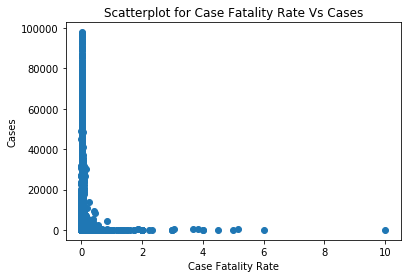

In [245]:
#Scatterplot for Case Fatality Rate Vs Cases
plt.scatter(daily['cfr'], daily['cases'])
plt.xlabel('Case Fatality Rate')
plt.ylabel('Cases')
plt.title('Scatterplot for Case Fatality Rate Vs Cases')

## Weekly Data: New Cases Vs Tests done

We know that, in most of the covid cases are asymptomatic. Hence, it may happen that someone is suffering from COVID but might not show up until and unless he/she goes for the testing. Thus, as the testing increases new cases are bound to increase and the same can be depicted from the below scatterplot. So, we can say that the new cases follows linear treand with the test done.

Text(0.5, 1.0, 'Scatterplot for New Cases Vs Tests Done')

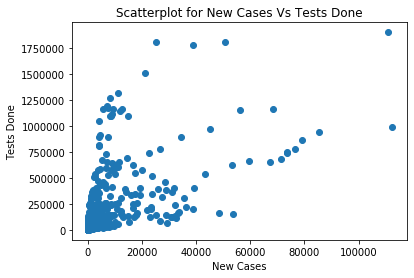

In [246]:
#Scatterplot for New cases Vs Tests
plt.scatter(weekly_tests['new_cases'], weekly_tests['tests_done'])
plt.xlabel('New Cases')
plt.ylabel('Tests Done')
plt.title('Scatterplot for New Cases Vs Tests Done')

## Combined dataset : Descriptive statistics

We can illustrate from the positivity rate column that the mean is 3.63 which means for every 3 tests done there is a positive COVID case across all the European countries where few countries have rate approximately around 69 which is quite high as compared to the third quartile value. Also, tests_done column demonstrates that every week on average around 117500 tests are taken place of which 4065 are the confirmed cases. But it depends on the population of the country which has mean value of 1.7 lakhs though there are some countries with very high and less populations comparatively. Also, below stats suggests that each week there are 201 deaths happening in Europe due to corona virus. But the third quartile value 70 of deaths column suggests that in the European continent there are very few countries which has more than 70 deaths increasing the mean value of deaths occurring. If we look at the case fatality rate it says that mean CFR is 4.5% which means out of every 100 positive cases there are 4 deaths occurring in Europe. On the other hand, the first quartile of CFR is 0.1% which suggests that there are few countries with very less CFR.

We can find the outliers in the data with the use of centered columns and we get 101 rows with the outliers.

In [247]:
weekly_deaths.describe()

,new_cases,tests_done,population,testing_rate,positivity_rate,Week,deaths,weekly_cfr,population_ce,testing_rate_ce,tests_done_ce,new_cases_ce,deaths_ce,positivity_rate_ce
count,980.000000,9.800000e+02,9.800000e+02,980.000000,980.000000,980.000000,980.000000,980.000000,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02
mean,4065.482653,1.175941e+05,1.724145e+07,883.434004,3.636358,24.605102,201.193878,0.045210,-6.045051e-16,-3.550448e-16,-4.984675e-17,-1.468213e-16,-2.065241e-16,4.259065e-16
std,10943.329271,2.371565e+05,2.279282e+07,1258.955864,5.729694,9.967269,734.391146,0.098459,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000e+00,3.569910e+05,0.000000,0.000000,1.000000,0.000000,0.000000,-7.407795e-01,-7.017196e-01,-4.958501e-01,-3.715033e-01,-2.739601e-01,-6.346514e-01
25%,82.000000,9.808000e+03,2.794184e+06,246.486503,0.519523,16.000000,1.000000,0.001261,-6.338514e-01,-5.059331e-01,-4.544935e-01,-3.640101e-01,-2.725984e-01,-5.439794e-01
50%,569.500000,2.905200e+04,7.000039e+06,518.991333,1.656237,25.000000,9.000000,0.012554,-4.493260e-01,-2.894801e-01,-3.733487e-01,-3.194624e-01,-2.617051e-01,-3.455893e-01
75%,2687.750000,9.932725e+04,1.728216e+07,1063.171073,4.240512,33.000000,70.250000,0.051649,1.786438e-03,1.427668e-01,-7.702430e-02,-1.258970e-01,-1.783026e-01,1.054426e-01
max,112248.000000,1.904386e+06,8.301921e+07,12947.023430,69.187675,41.000000,6391.000000,1.500000,2.885899e+00,9.582218e+00,7.534233e+00,9.885704e+00,8.428487e+00,1.144063e+01


In [248]:
outliers_data = weekly_deaths[['population_ce','testing_rate_ce','new_cases_ce','tests_done_ce','deaths_ce','positivity_rate_ce']]
print(outliers_data[(np.abs(outliers_data)>3).any(1)])

     population_ce  testing_rate_ce  new_cases_ce  tests_done_ce  deaths_ce  \
26       -0.253849        -0.701151     -0.369858      -0.495504  -0.273960   
30       -0.253849        -0.513528      0.353413      -0.381407   0.650615   
31       -0.253849        -0.435279      0.515978      -0.333822   1.746761   
32       -0.253849        -0.330641      0.662551      -0.270189   2.393556   
114      -0.718013        -0.680409     -0.365746      -0.494859  -0.273960   
..             ...              ...           ...            ...        ...   
975       2.167598         1.100223      1.548388       5.879410  -0.173196   
976       2.167598         1.455161      1.929807       7.135176  -0.088773   
977       2.167598         1.422747      3.184910       7.020496   0.014714   
978       2.167598         1.450846      4.265111       7.119911   0.197178   
979       2.167598         1.567953      9.755854       7.534233   0.329261   

     positivity_rate_ce  
26             3.196482  

## Deaths Vs Tests done

The below scatterplot outlines that the number of deaths has been dropped rapidly after the mas testing is applied. This is possible because people can start taking preventive measures or treatment before the virus spreads in the body and becomes severe. We can clearly suggest that increase in testing definitely lleads to deacrease in the number of deaths. Also, the histogram and boxplot picturize that very few countries have large number of weekly deaths which includes United Kingdom, Spain, Italy, France and Germany. We are aware that the corona spread rapidly in these countries in the first few months causing the deaths of lot of people.


Text(0.5, 1.0, 'Scatterplot for Deaths Vs Tests Done')

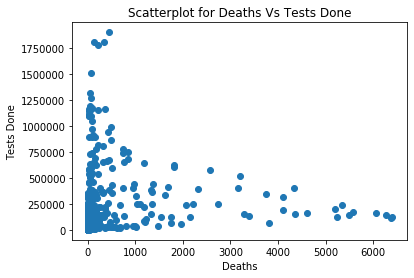

In [249]:
#Scatterplot for Deaths Vs Tests
plt.scatter(weekly_deaths['deaths'], weekly_deaths['tests_done'])
plt.xlabel('Deaths')
plt.ylabel('Tests Done')
plt.title('Scatterplot for Deaths Vs Tests Done')

Text(0.5, 1.0, 'Boxplot for Deaths by Country')

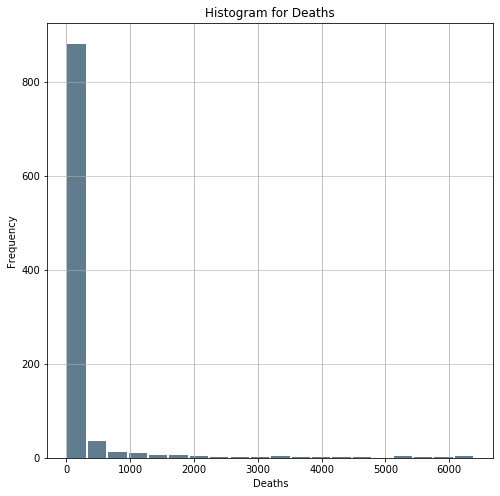

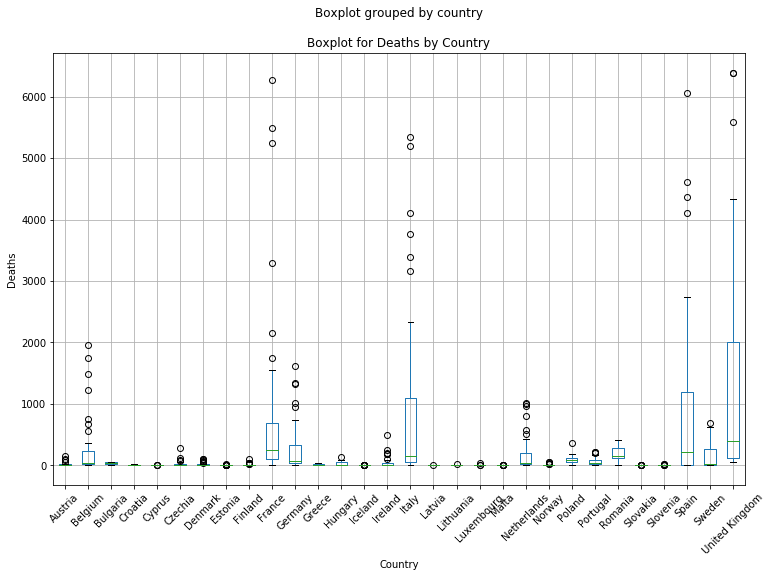

In [250]:
import numpy as np

weekly_deaths['deaths'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(8,8))
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.title('Histogram for Deaths')
plt.grid(axis='y', alpha=0.75)

weekly_deaths.boxplot(column=['deaths'], by=['country'],figsize=(12,8))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Boxplot for Deaths by Country')

## New Cases, positivity_rate, testing_rate Vs Country

Further, we can analyze each variable thoroughly to find which variable is responsible for the increase in covid cases. The histogram for new_cases tells the story that in most of the countries the weekly cases are under 5000. If we dig in to the boxplot, we can see that France, Germany, Italy , Spain and United Kingdom has the above average cases which are leading to increase in the mean weekly cases of the continent. 

Also, the positivity rate lies between 0 to 15% for most of the cases which means out of 100 at the most 15 person are probable to have corona virus but it may exceed due to sudden outbreak or reopening the market after lockdown. France, Belgium, Netherland, Spain and Sweden have higher positivity rate as compared to other countries in Europe. Likewise, if the country takes more testing then it is highly possible to decrease the positivity. The main reason for this being, most of the people undergoes testing only if there are severe symptoms. 

The testing_rate is the number of tests per lakh people in that country in particular week. We can observe that this valueslies mostly below 2000 which says on average 1% people are tested per week. It is a very good number to control the spread, but few countries can cover more testing_rate as the population is less. Luxembourg, Malta, Iceland, Denmark and Belgium have carried more testing than other countries for some period. 


Text(0.5, 1.0, 'Boxplot for New Cases by Country')

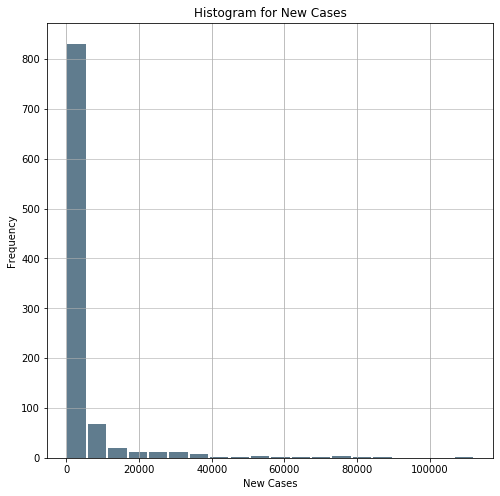

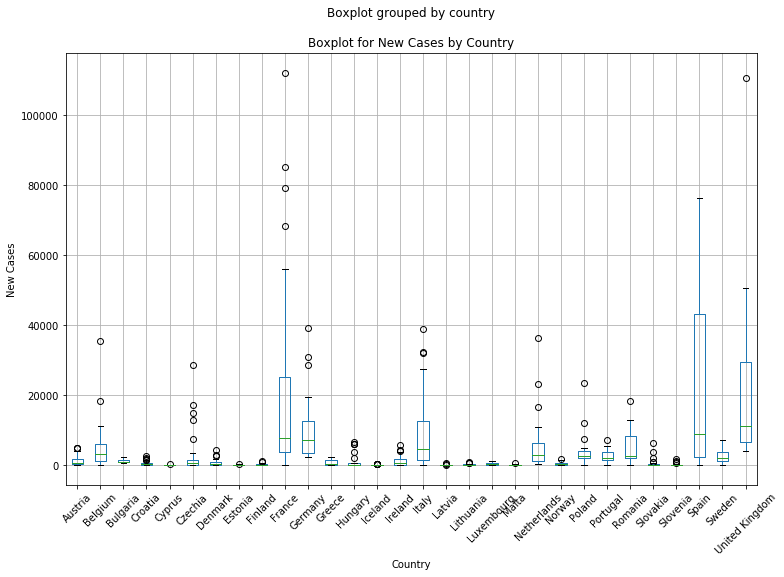

In [251]:
import numpy as np

weekly_deaths['new_cases'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(8,8))
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.title('Histogram for New Cases')
plt.grid(axis='y', alpha=0.75)

weekly_deaths.boxplot(column=['new_cases'], by=['country'],figsize=(12,8))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.title('Boxplot for New Cases by Country')

Text(0.5, 1.0, 'Boxplot for Positivity Rate by Country')

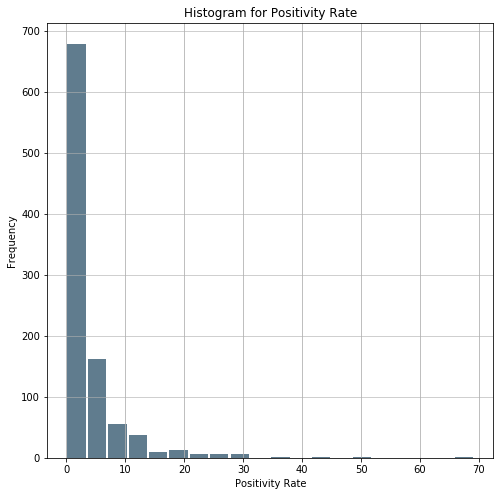

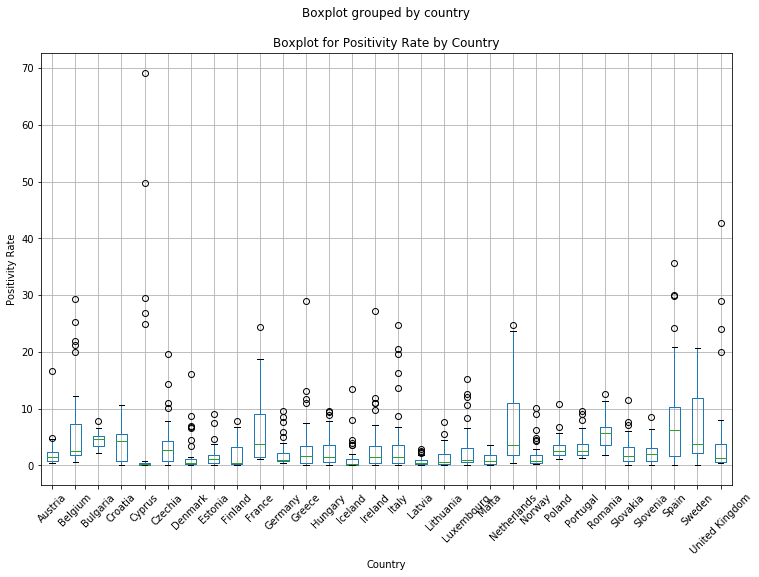

In [252]:
weekly_deaths['positivity_rate'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(8,8))
plt.xlabel('Positivity Rate')
plt.ylabel('Frequency')
plt.title('Histogram for Positivity Rate')
plt.grid(axis='y', alpha=0.75)

weekly_deaths.boxplot(column=['positivity_rate'], by=['country'],figsize=(12,8))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Positivity Rate')
plt.title('Boxplot for Positivity Rate by Country')

Text(0.5, 1.0, 'Scatterplot for Positivity Rate Vs Tests done')

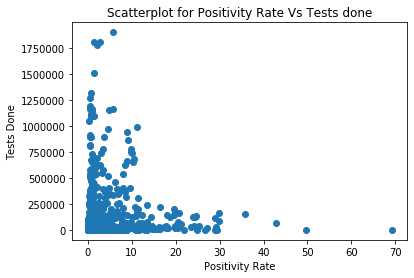

In [253]:
plt.scatter(weekly_deaths['positivity_rate'], weekly_deaths['tests_done'])
plt.xlabel('Positivity Rate')
plt.ylabel('Tests Done')
plt.title('Scatterplot for Positivity Rate Vs Tests done')

Text(0.5, 1.0, 'Boxplot for Testing Rate by Country')

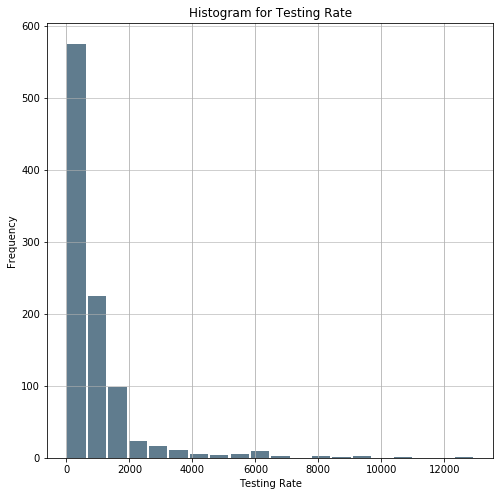

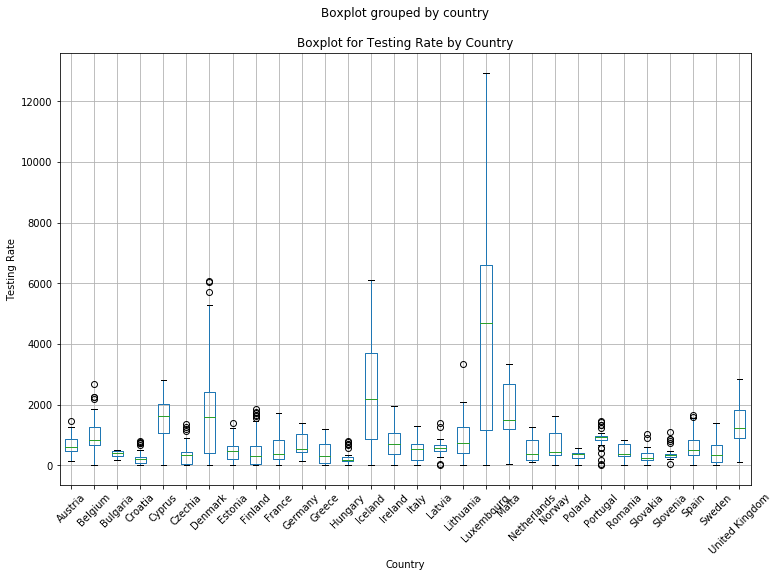

In [254]:
weekly_deaths['testing_rate'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(8,8))
plt.xlabel('Testing Rate')
plt.ylabel('Frequency')
plt.title('Histogram for Testing Rate')
plt.grid(axis='y', alpha=0.75)

weekly_deaths.boxplot(column=['testing_rate'], by=['country'],figsize=(12,8))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Testing Rate')
plt.title('Boxplot for Testing Rate by Country')


## Case Fatality Rate

Here, we have opted the definition of CFR for a week, so it does not actually calcualtes the rate between cases happened in the same week. The patient deceased may be tested positive in previous weeks. Owing to this definition, we found the CFR to be in the range 0 to 0.1 majorly but there are few cases where it exceeds as we expect it to. Also, the boxplot depicts that the countries France, Hungary, Spain and Slovenia have higher fatality rates comparitively. If we plot the CFR against the tests_done, it shows that the more testing reduces the case fatality rate helping the government to take preventive measures as most of the population would be tested for COVID. It alos shows the higher values of CFR only for less tests.

Text(0.5, 1.0, 'Boxplot for Case Fatality Rate by Country')

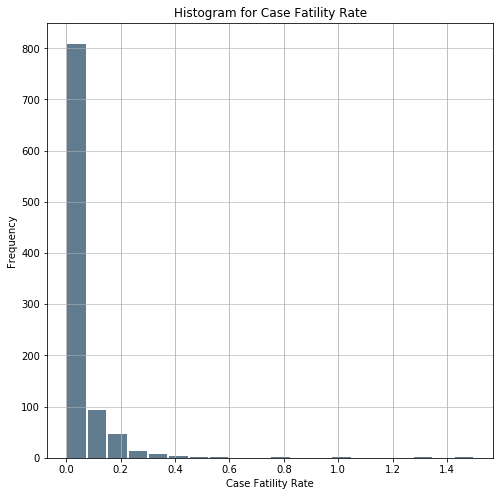

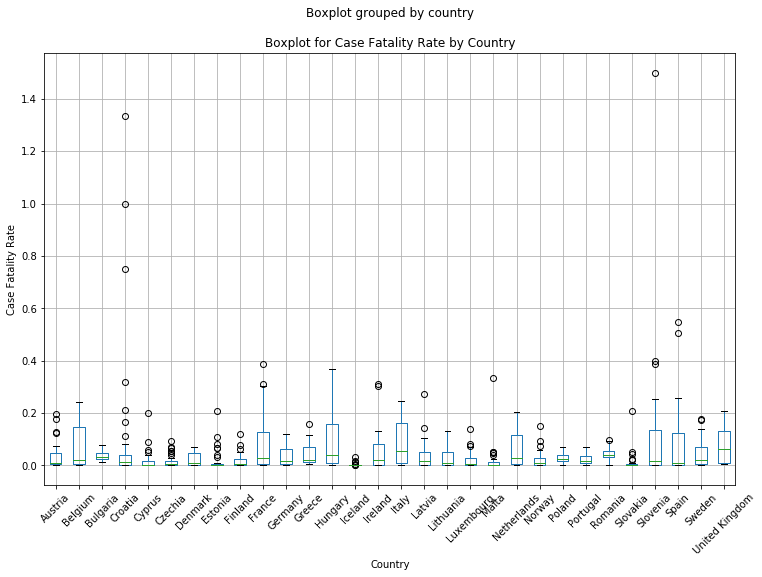

In [255]:
weekly_deaths['weekly_cfr'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e',figsize=(8,8))
plt.xlabel('Case Fatility Rate')
plt.ylabel('Frequency')
plt.title('Histogram for Case Fatility Rate')
plt.grid(axis='y', alpha=0.75)

weekly_deaths.boxplot(column=['weekly_cfr'], by=['country'],figsize=(12,8))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Case Fatality Rate')
plt.title('Boxplot for Case Fatality Rate by Country')

Text(0.5, 1.0, 'Scatterplot for Case Fatility Rate Vs Tests')

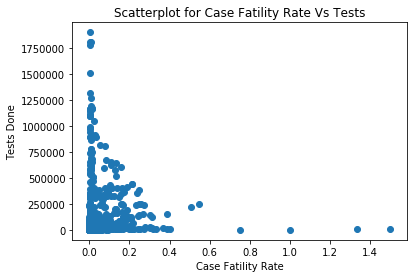

In [256]:
#Scatterplot for Case Fatility Rate Vs Tests
plt.scatter(weekly_deaths['weekly_cfr'], weekly_deaths['tests_done'])
plt.xlabel('Case Fatility Rate')
plt.ylabel('Tests Done')
plt.title('Scatterplot for Case Fatility Rate Vs Tests')

# Statistical Analysis




## Correlation between variables

From the below pairplot we are trying to depict the relations between the new_cases_ce and other variables. We can clearly see the first and second wave from the Week column plot where the new_cases shows sudden rise and fall but the correlation coefficient is weak positive (0.18). Also, we can see how deaths are correlated with the Week and new_cases. Its shows that at the start and end of the given period the deaths are very less but there is a phase around 20 weeks where the deaths reach its peak. On the other hand, the tests_done column is linear with the new_cases as there will be more patients tested positive with intense covid testing and r = 0.61. However, we can observe the population against new_cases are grouped because all the values lie on same vertical line with r = 0.49. We can also say that there is bucketing for the population column. From the testing_rate statistics we can easily depict that the positive cases increase with the rise in the testing rate. The behaviour of positivity can be plotted like the testing_rate with r = 0.35.


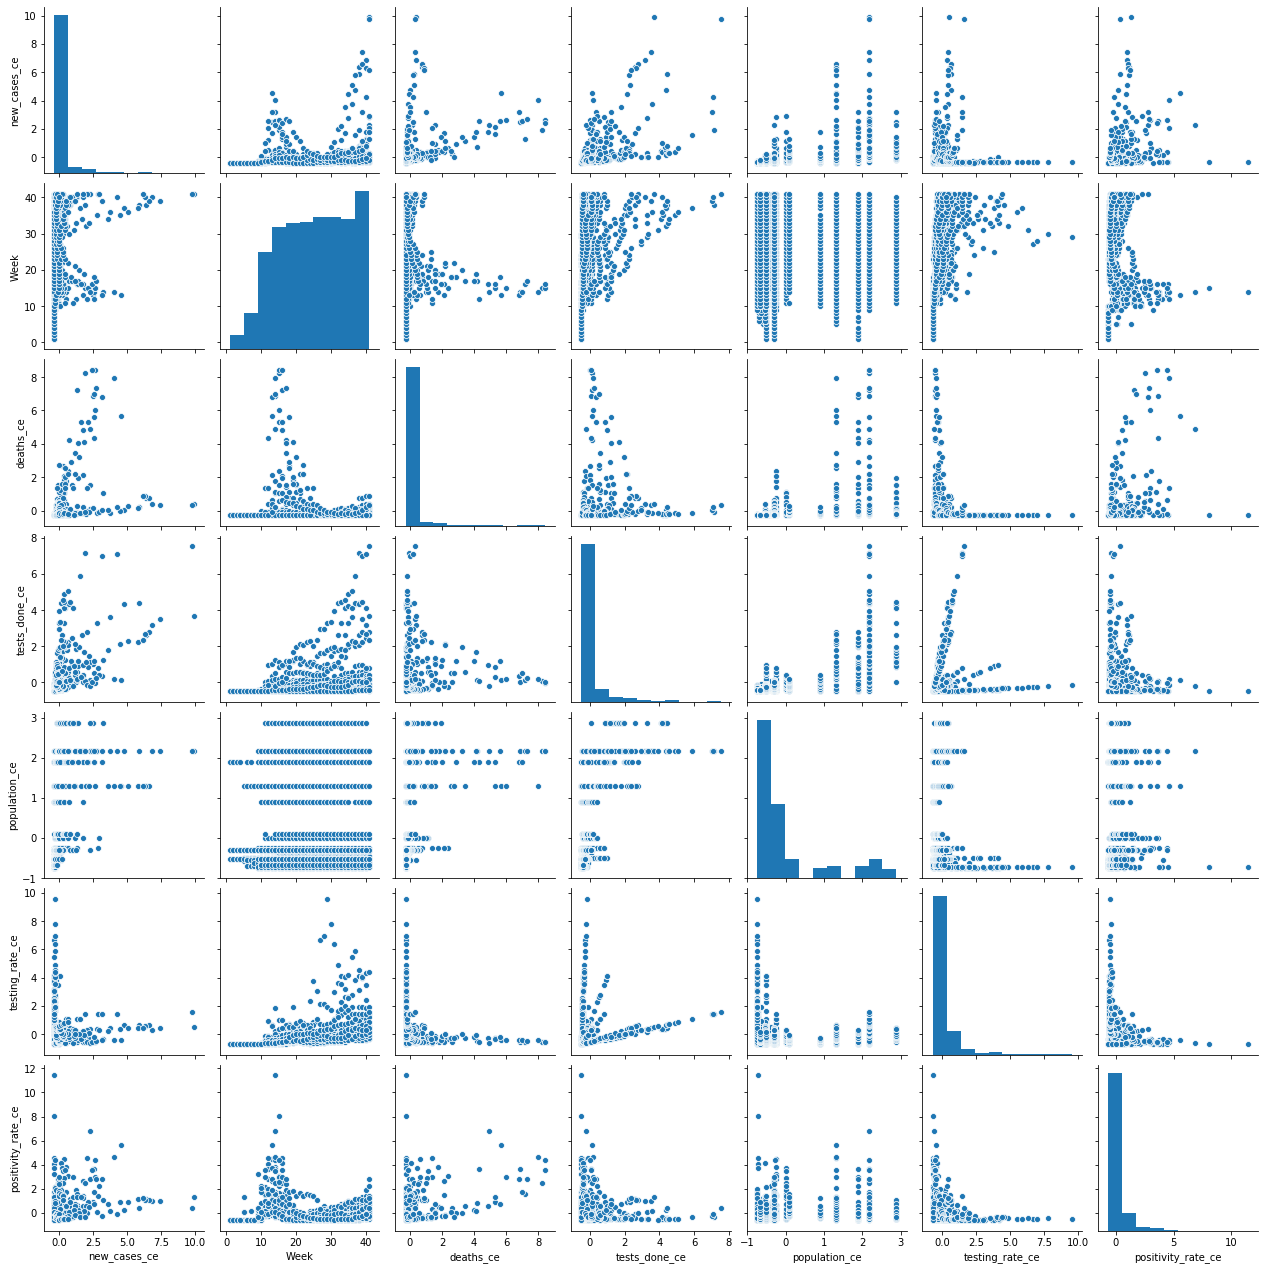

In [257]:
# Seaborn visualization library
import seaborn as sns
# Create the  parplot
sns.pairplot(weekly_deaths[['new_cases_ce','Week','deaths_ce','tests_done_ce','population_ce','testing_rate_ce', 'positivity_rate_ce']])

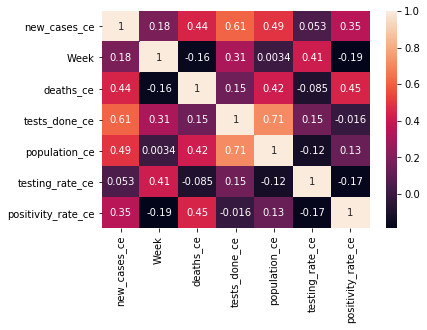

In [258]:
#correlation matrix for the variables
corrMatrix = weekly_deaths[['new_cases_ce','Week','deaths_ce','tests_done_ce','population_ce','testing_rate_ce', 'positivity_rate_ce']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Hypothesis Testing


In [259]:
import scipy.stats as stats

### Two-sample t-test

Let's see whether new_cases_ce  is significantly different between those tests_done_ce > 0 versus tests_done_ce<=0.

In [260]:
new_cases_ce_gt_0 = weekly_deaths.new_cases_ce[weekly_deaths.tests_done_ce>0]
new_cases_ce_lt_0 = weekly_deaths.new_cases_ce[weekly_deaths.tests_done_ce<=0]

In [261]:
stats.ttest_ind(new_cases_ce_gt_0, new_cases_ce_lt_0)

Ttest_indResult(statistic=18.636156903142634, pvalue=1.4429885681911143e-66)

The p-value is very less then 0.05 so we can say that both the samples are significantly different than each other.

### Mann Whitney U test


In [262]:
stats.mannwhitneyu(new_cases_ce_gt_0, new_cases_ce_lt_0)

MannwhitneyuResult(statistic=8523.5, pvalue=4.2520303673138553e-94)

As the p-vlaue <0.05 the null hypothesis can be rejected and at least one significant difference can be assumed.

### Kolmogorov-Smirnov


In [263]:
stats.kstest(weekly_deaths.new_cases_ce, 'norm')

KstestResult(statistic=0.35513135892003556, pvalue=4.318006698937875e-111)

This result is significant as the data does not match a standard normal distribution. 

## QQ-plots

The data points form a curve instead of a straight line. Normal Q-Q plots that look like this usually mean our sample data are skewed.

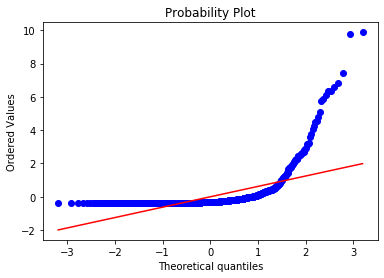

In [264]:
import scipy.stats as stats

plt.figure()
stats.probplot(weekly_deaths.new_cases_ce, dist='norm',plot=plt);


# Regression Modelling


## Fitting Linear Model

Here we are trying to find the fit for the new_cases based on the given variables. We can consider Week, tests_done_ce, population_ce, testing_rate_ce and Country as the input variables and fit a model. We can notice that the obtained model gives the R-squared values as 0.502 which says that 50% of the variance in the data is explained by this model and the Adjusted R- squared value of 48.6 tells us that one or more variable doesn’t fit in the model as it decreases the value of R-squared. If we check the t-test characteristic for the variables, it can be clearly said that the variables do not fit correctly as for most of the variables the p-values is > 0.05. Hence, we need to optimize our model here. For this purpose, we can get rid of the testing_rate_ce column as it can be formulated by tests_done and population_ce. We can group the country into 4 buckets based on the new_cases_ce column.

In [265]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='new_cases_ce ~ Week + tests_done_ce + population_ce + testing_rate_ce + C(country)', data=weekly_deaths)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           new_cases_ce   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     29.88
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          1.34e-120
Time:                        09:36:16   Log-Likelihood:                -1048.1
No. Observations:                 980   AIC:                             2162.
Df Residuals:                     947   BIC:                             2323.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## Optimization of the model


We must decide how we should group the column Country so that it gives better fit in the model. After looking at the new_cases vs country plot we can come to conclusion that bucketing the country based on the median values of new_cases_ce we can get better results as expected with the country column. However, the week column does not fit into model because p-value > 0.05. So, we need to remove that column and obtain a new model which gives us all the estimates with p-value < 0.05 to get a better fit. Here, the R-squared and Adjusted R-squared are almost same i.e. around 42%. It demonstrates that 42% of the variance in data can be explained by the model and around same after adjustment of the residuals of the variables. The hypothesis that these variables have estimates equal to zero can be rejected because p-values for all the columns is less than 0.05. 

The predictions that we have mentioned above are true because the variable which influences the values of the predictor most is Country group 4 increasing the predicted value by 1.7839. This group has highest median for the new_cases_ce followed by the group 3 which has estimate of 1.5209. Similarly, with the unit increase in test_done_ce, the new_cases_ce grows by 0.4991. This is also true as the mass testing will help to detect the majority patients with symptoms of corona virus. However, the population has reverse effect on the predictor, and it will decrease with the increase in population. Practically, this is true because increase in population will decrease the testing rate and hence lowers the probability of targeting a positive patient.

We can make sure that there is less possibility of multicollinearity as conditional number is quite less and the summary also suggests that the covariance type is non-robust.


In [266]:
# get the median values of new_cases_ce for each country
y_med = weekly_deaths.groupby(['country']).agg(new_cases_ce=('new_cases_ce', np.median))

y_med = y_med.sort_values('new_cases_ce').reset_index()
y_med

,country,new_cases_ce
0,Iceland,-0.368488
1,Latvia,-0.366980
2,Cyprus,-0.366797
3,Malta,-0.366386
4,Estonia,-0.366249
5,Lithuania,-0.363096
6,Slovenia,-0.359852
7,Finland,-0.357705
8,Slovakia,-0.357385
9,Hungary,-0.349663


In [267]:
# Creating four groups for the country column
condition_one = (y_med["new_cases_ce"] <= -0.2)
condition_two = (y_med["new_cases_ce"] > -0.2) & (y_med["new_cases_ce"] <= 0)
condition_three = (y_med["new_cases_ce"] > 0) & (y_med["new_cases_ce"] <= 0.35)
condition_four = (y_med["new_cases_ce"] > 0.35)

conditions = [condition_one, condition_two,condition_three,condition_four]
choices = [1, 2,3,4]
y_med['country_group'] = np.select(conditions, choices, default="")
y_med = y_med.drop('new_cases_ce', axis = 1)

weekly_deaths = weekly_deaths.merge(y_med, how='inner', left_on=[ "country"], right_on=["country"])
weekly_deaths.head()

,country,new_cases,tests_done,population,testing_rate,positivity_rate,Week,deaths,weekly_cfr,population_ce,testing_rate_ce,tests_done_ce,new_cases_ce,deaths_ce,positivity_rate_ce,country_group
0,Austria,2041,12339,8858775,139.285624,16.541049,15,151,0.073983,-0.367777,-0.591084,-0.443821,-0.184997,-0.068348,2.252248,1
1,Austria,855,58488,8858775,660.226724,1.461838,16,106,0.123977,-0.367777,-0.177296,-0.249228,-0.293373,-0.129623,-0.379518,1
2,Austria,472,33443,8858775,377.512692,1.411357,17,93,0.197034,-0.367777,-0.401858,-0.354834,-0.328372,-0.147325,-0.388328,1
3,Austria,336,26598,8858775,300.244673,1.263253,18,60,0.178571,-0.367777,-0.463233,-0.383696,-0.340800,-0.192260,-0.414177,1
4,Austria,307,42153,8858775,475.833284,0.728299,19,19,0.061889,-0.367777,-0.323761,-0.318107,-0.343450,-0.248088,-0.507542,1


In [268]:
#Refitting the model removing the week column
mod = smf.ols(formula='new_cases_ce ~ population_ce + tests_done_ce + C(country_group)', data=weekly_deaths)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           new_cases_ce   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          2.40e-115
Time:                        09:36:16   Log-Likelihood:                -1116.7
No. Observations:                 980   AIC:                             2245.
Df Residuals:                     974   BIC:                             2275.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.35

## Variance Inflation Factor

VIF is the reciprocal of the tolerance value, and small VIF values indicates low correlation among variables under ideal conditions VIF < 3. Here all the values are under 3 so we need not worry about the mulitcollinearity here.


In [269]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = weekly_deaths[['tests_done_ce','population_ce','testing_rate_ce','deaths_ce','Week','new_cases_ce']].iloc[:,:-1]
calc_vif(X)


,variables,VIF
0,tests_done_ce,2.470291
1,population_ce,2.840592
2,testing_rate_ce,1.166067
3,deaths_ce,1.283316
4,Week,1.041139


## Interpreting the Residual Plots

From the below plots we can illustrate that there are some outliers which gives odd values of residuals not belonging to the zero mean. But we can expect this as behaviour of the new cases also depends on the factors other than we have included in the model such as the lockdown, restricted movements or opening the after lockdown. There are some outliers which the model fails to predict and there is huge error.

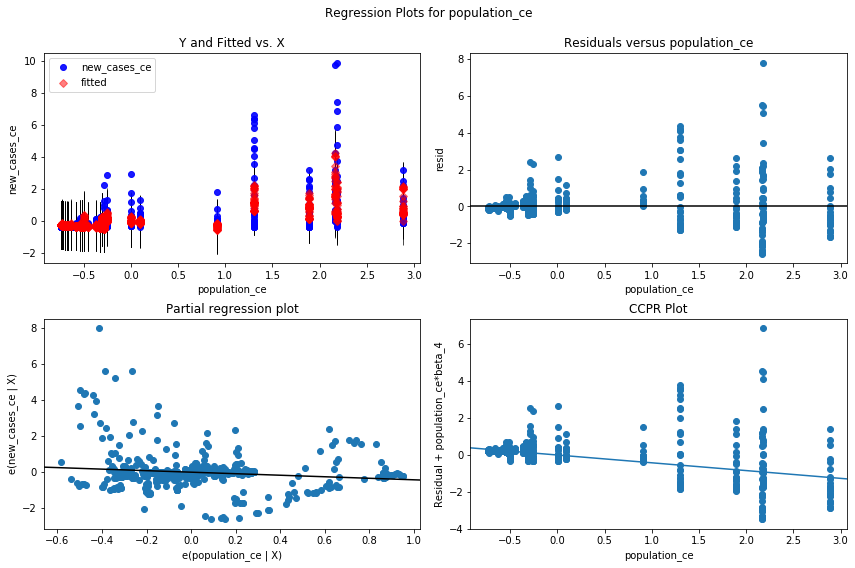

In [270]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'population_ce', fig=fig)


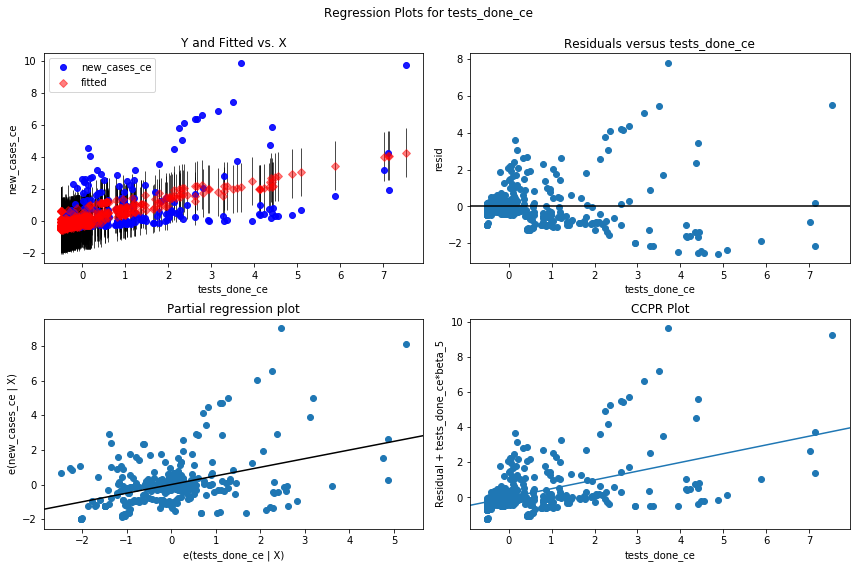

In [271]:
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'tests_done_ce', fig=fig)

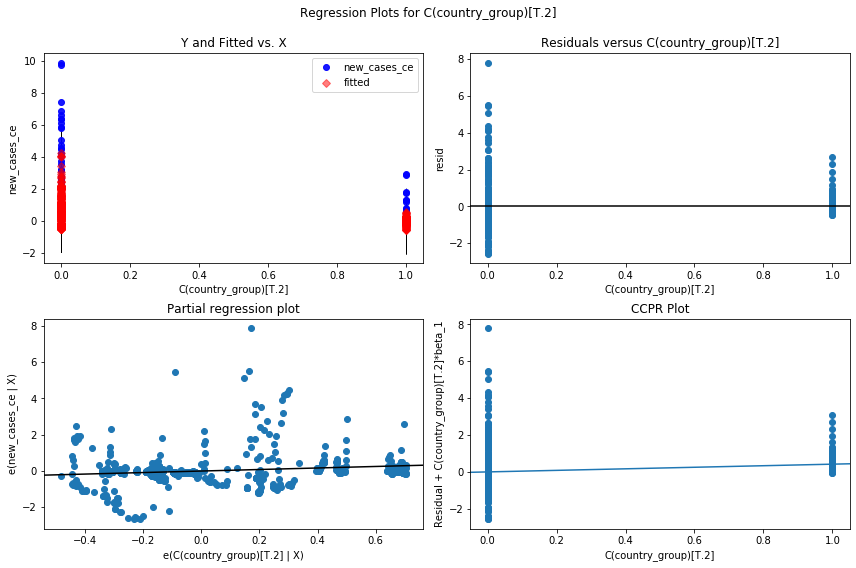

In [272]:
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'C(country_group)[T.2]', fig=fig)

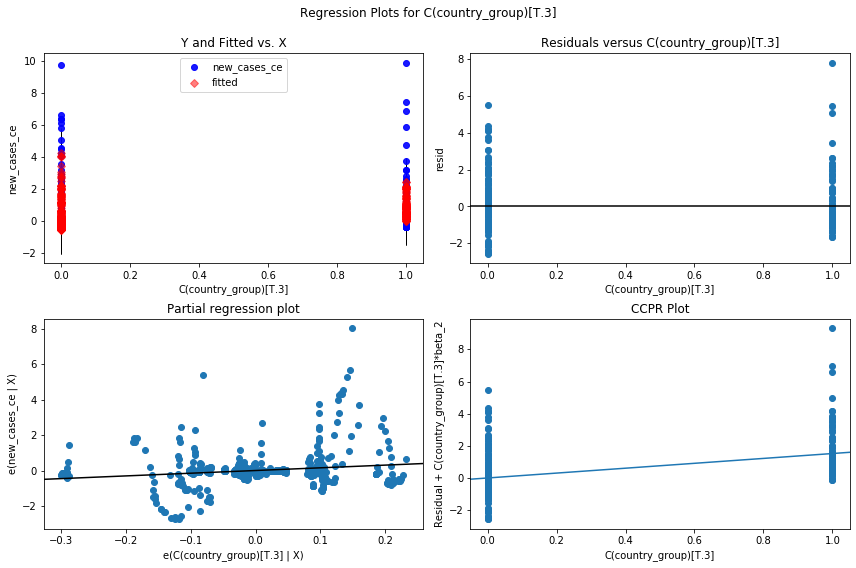

In [273]:
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'C(country_group)[T.3]', fig=fig)

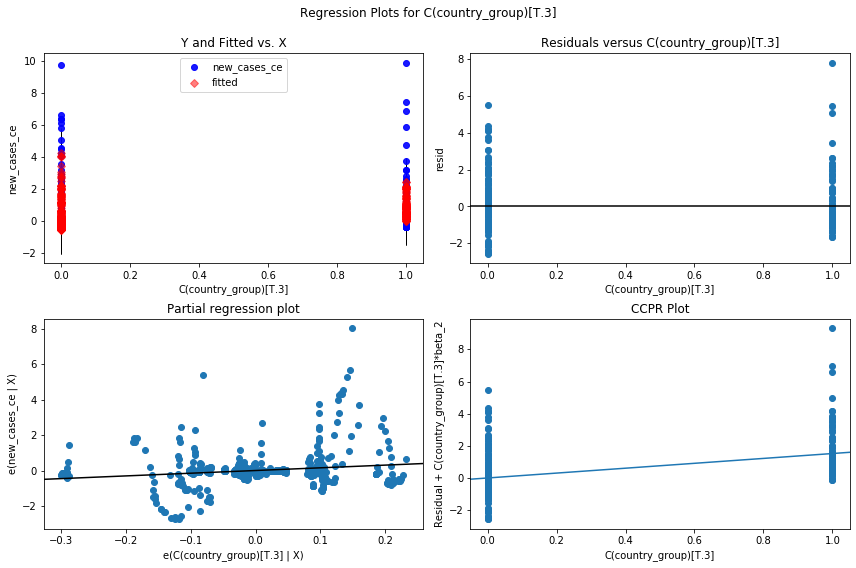

In [274]:
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'C(country_group)[T.3]', fig=fig)

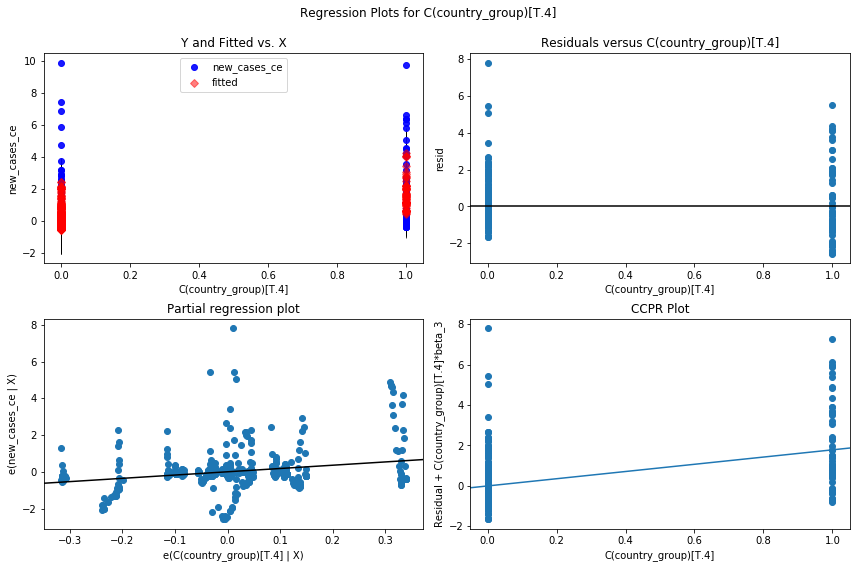

In [275]:
fig = plt.figure(figsize=(12,8))
#produce regression plots
fig = sm.graphics.plot_regress_exog(res, 'C(country_group)[T.4]', fig=fig)

# Conclusion

The above analysis outlines that mass testing increases the number of positive cases which gives the better understanding of how the virus is spreading across the country. Also, it will decrease the case fatality rate because the patients will get treated at the early stage of the virus. It will also reduce the spread of virus as the positive patients will be kept quarantined and under observation so that they cannot encounter others. It will also help the government to imply preventive measures such as lockdown or restrictive moments if the covid spread is too high. population of the country also plays major role in depicting the behaviour of new cases. It is hard to keep the testing rate high in dense countries than the one with low population. Increase in the number of cases creates the race for the hospitality, hence controlled testing is also necessary to not create chaos between the citizens. Case fatality rate and new cases varies a lot with the Countries as there are some countries with corona being highly spread and there are few where it is about to vanish. This makes the country factor most important in our model. We can illustrate that the countries which belong to group 4 that includes Spain and United Kingdom have the highest increase in the new cases followed by group 3 which includes Italy, Germany and France.

We have plotted various scenarios which tells us that the Case fatality rate decreases exponentially with the testing rate i.e. number of tests per lakh population. Number of tests also helps the researchers to study the virus and bring new methods of treatment which reduces the risk of like and hence reducing the case fatality rate. The main effect of testing was seen when mass testing has started. New cases have started to increase suddenly and same can be seen in the correlation plot. We have also learnt from the data that few countries in the Europe such as United Kingdom, Italy, Germany and Spain are highly affected by the corona virus. Hence, we can have the high spikes in the data along with some outliers which makes our model create large residuals though we have reduced them by grouping the countries into categories. Also, we can say that the number of deaths declines with the increase the number of cases. 

There are numerous other factors such as demographics data of the country. It may be possible that one country has old people more than young. We know that old population have more probability to catch the corona virus. Corona virus spreads if social distancing is not maintained, so it would be tough in the highly dense countries to stop the spread of corona virus even if the restrictions are applied. Further, the healthcare facilities also play an important role in controlling the corona virus. As the cases increases, the number of beds required increases which may lead to lower the testing rate. Another study has shown that the environment conditions also has a key effect on the growth of coronavirus as they say higher temperatures lowers the effect of virus. In India, there is huge number of covid patients, but the CFR is very less, and this may be because of the temperature of the country. While, in countries like United Kingdom, Italy and France, though the population density is low, but temperature is also low causing more deaths due to the virus. Several studies predicted that by the end of the next year 80% of people will create antibodies for the corona virus themselves. Mass testing also helped researchers to get the vaccine quickly to stop the virus. The United Kingdom have approved the vaccines which will be available in the market in few weeks. Overall, predicting the effect of corona virus can be critical as there are several practical factors and government decisions included. But if these subjects are kept constant then the data along with the demographic information may prove helpful for prediction with the help of times series analysis.


# References

1. Wikipedia: https://en.wikipedia.org/wiki/COVID-19_pandemic
2. European Centre for Disease Prevention and Control: https://www.ecdc.europa.eu/en/publications-data/covid-19-testing 
3. Stackoverflow: https://stackoverflow.com/
4. Case fatality rate : https://ourworldindata.org/mortality-risk-covid#case-fatality-rate 
5. Physio-pedia: https://www.physio-pedia.com/Coronavirus_Disease_(COVID-19)
6. Science Direct: https://www.sciencedirect.com/journal/science-of-the-total-environment
7. Britanica: https://www.britannica.com/science/case-fatality-rate